# Welcome to this notebook on Loan Prediction Problem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("train (3).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Cleaning

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Droping Unnecessary Column

In [7]:
df = df.drop(columns='Loan_ID')

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [9]:
mode_df = df['Loan_Amount_Term'].mode()[0]

In [10]:
df['Loan_Amount_Term'].fillna((mode_df), inplace=True)

In [11]:
median_df = df['LoanAmount'].median()
df['LoanAmount'].fillna((median_df), inplace=True)

In [12]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
column_objects = df.select_dtypes(include=['object'])
column_objects 

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


# Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
column_objects = column_objects.apply(LabelEncoder().fit_transform)
column_objects

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [15]:
df = df.drop(['Gender', 'Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'], axis = 1)

In [16]:
df_new = pd.concat([df,column_objects],axis = 1)
df_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,2,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1


# Feature Engineering

In [17]:
#creating a new feature
df_new['Total_Income'] = df_new['ApplicantIncome'] + df_new['CoapplicantIncome']
df_new.drop(['ApplicantIncome', 'CoapplicantIncome'], axis='columns', inplace=True)

In [18]:
df_new.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Total_Income
0,128.0,360.0,1.0,1,0,0,0,0,2,1,5849.0
1,128.0,360.0,1.0,1,1,1,0,0,0,0,6091.0
2,66.0,360.0,1.0,1,1,0,0,1,2,1,3000.0
3,120.0,360.0,1.0,1,1,0,1,0,2,1,4941.0
4,141.0,360.0,1.0,1,0,0,0,0,2,1,6000.0



# EDA

Univariate Analysis:

<AxesSubplot:xlabel='Dependents', ylabel='count'>

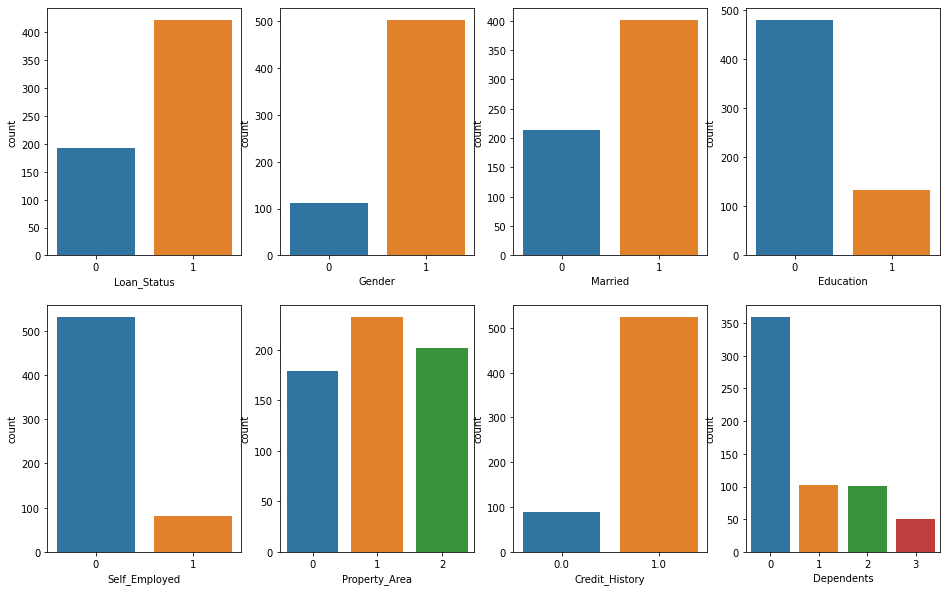

In [19]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Loan_Status', data = df_new, ax=ax[0][0])
sns.countplot(x='Gender', data = df_new, ax=ax[0][1])
sns.countplot(x='Married', data = df_new, ax=ax[0][2])
sns.countplot(x='Education', data = df_new, ax=ax[0][3])
sns.countplot(x='Self_Employed', data = df_new, ax=ax[1][0])
sns.countplot(x='Property_Area', data = df_new, ax=ax[1][1])
sns.countplot(x='Credit_History', data = df_new, ax=ax[1][2])
sns.countplot(x='Dependents', data = df_new, ax=ax[1][3])

Bivariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income'>

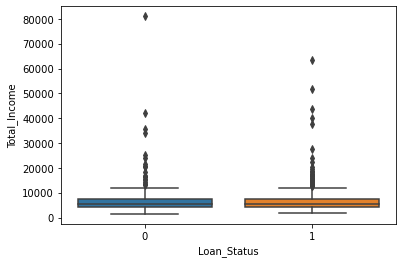

In [20]:
sns.boxplot(x='Loan_Status', y='Total_Income', data=df_new)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

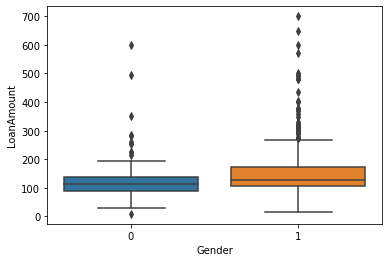

In [21]:
sns.boxplot(x='Gender', y='LoanAmount', data=df_new)

<AxesSubplot:>

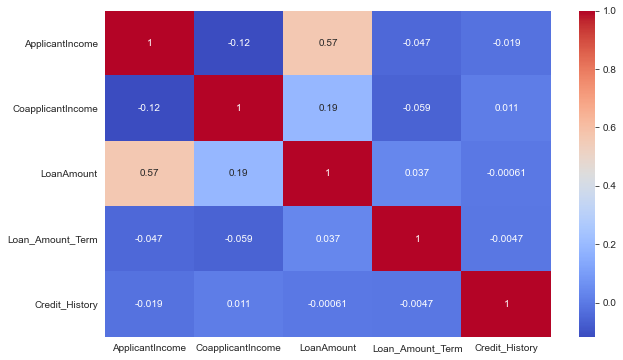

In [22]:
sns.set_style("dark")
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

<AxesSubplot:xlabel='LoanAmount'>

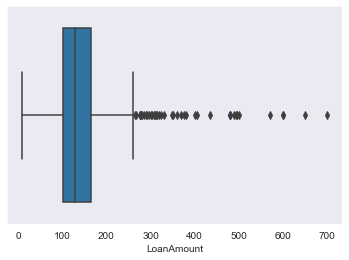

In [53]:
sns.boxplot(x=df_new['LoanAmount'])

<AxesSubplot:>

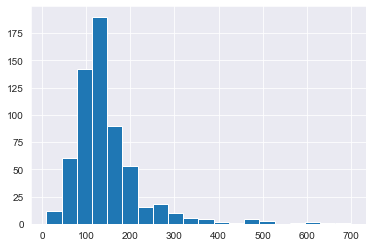

In [24]:
df_new['LoanAmount'].hist(bins=20)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail 
is longer. This is called right skewness
One way to remove the skewness is by doing the log transformation. As we take the 
log transformation, it does not affect the smaller values much, but reduces the larger values.

So, we get a distribution similar to normal distribution

<AxesSubplot:>

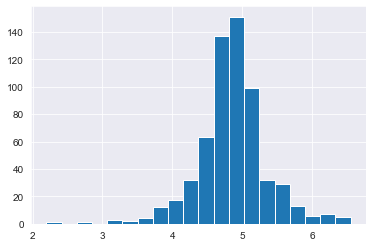

In [25]:
df_new["LoanAmount_log"]=np.log(df_new["LoanAmount"])
df_new['LoanAmount_log'].hist(bins=20)

In [26]:
df_new.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Total_Income,LoanAmount_log
0,128.0,360.0,1.0,1,0,0,0,0,2,1,5849.0,4.852030
1,128.0,360.0,1.0,1,1,1,0,0,0,0,6091.0,4.852030
2,66.0,360.0,1.0,1,1,0,0,1,2,1,3000.0,4.189655
3,120.0,360.0,1.0,1,1,0,1,0,2,1,4941.0,4.787492
4,141.0,360.0,1.0,1,0,0,0,0,2,1,6000.0,4.948760


# Model Building

In [27]:
X = df_new.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]]
y = df_new.iloc[:,-3]

# Standardization

In [28]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression()

In [32]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [33]:
ypred = logreg.predict(X_test)

In [34]:
ac = accuracy_score(y_test,ypred)
ac

0.8162162162162162

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.93      0.44      0.60        57
           1       0.80      0.98      0.88       128

    accuracy                           0.82       185
   macro avg       0.86      0.71      0.74       185
weighted avg       0.84      0.82      0.79       185



# SVM

In [54]:
from sklearn.svm import SVC
svm=SVC()

In [55]:
svm.fit(X_train,y_train)

SVC()

In [56]:
ypred = svm.predict(X_test)

In [58]:
ac = accuracy_score(y_test,ypred)
ac

0.8162162162162162

In [59]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.93      0.44      0.60        57
           1       0.80      0.98      0.88       128

    accuracy                           0.82       185
   macro avg       0.86      0.71      0.74       185
weighted avg       0.84      0.82      0.79       185



# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [42]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
ypred = dt.predict(X_test)

In [44]:
ac = accuracy_score(y_test,ypred)
print("Accuracy Score :",ac)

Accuracy Score : 0.7081081081081081


In [45]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.52      0.63      0.57        57
           1       0.82      0.74      0.78       128

    accuracy                           0.71       185
   macro avg       0.67      0.69      0.68       185
weighted avg       0.73      0.71      0.71       185



# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)

In [47]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [48]:
rfc_pred = rfc.predict(X_test)

In [49]:
y_test

331    1
171    1
201    1
75     0
432    1
      ..
360    0
125    1
200    1
548    0
421    0
Name: Loan_Status, Length: 185, dtype: int32

In [50]:
rfc_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0])

In [51]:
ac = accuracy_score(y_test, rfc_pred)
ac

0.7945945945945946

In [52]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.76      0.49      0.60        57
           1       0.80      0.93      0.86       128

    accuracy                           0.79       185
   macro avg       0.78      0.71      0.73       185
weighted avg       0.79      0.79      0.78       185



# The highest classification accuracy is shown by Logistic Regression = 81.62%

# 